### 2400 device

2400 device는 drain/source voltage를 인가하고, 이에 따른 transistor device에 흐르는 전류를 측정한다.

In [ ]:
test = "1e-3"

print(f"test = {test}")

In [21]:
import math
y = 1.935063e-11
print(math.log10(y))


-10.713304891054907


KEITHLEY INSTRUMENTS INC.,MODEL 2420,4051227,C32   Oct  4 2010 14:20:11/A02  /J/L

1.935063e-11
-24.66829613884323
3.045297e-11
-24.214837589583247
2.84347e-11
-24.283410885603494
3.045381e-11
-24.21481000644718
3.852829e-11
-23.979628339277166
3.196698e-11
-24.16631762087835
3.398648e-11
-24.105058317453768
3.550016e-11
-24.06148391241508
2.43966e-11
-24.436577337601
2.288331e-11
-24.500613292048165
3.650857e-11
-24.033474088379474
2.792977e-11
-24.301327970878265
2.389289e-11
-24.457440190789622
2.338796e-11
-24.478799755895363
4.710804e-11
-23.77857742883693
2.540668e-11
-24.39600898435444
1.329387e-11
-25.04371808920457
3.398615e-11
-24.10506802724431
2.641581e-11
-24.357058421387183
3.39862e-11
-24.105066556057864
Conductance: -0.03481702099855284 Siemens


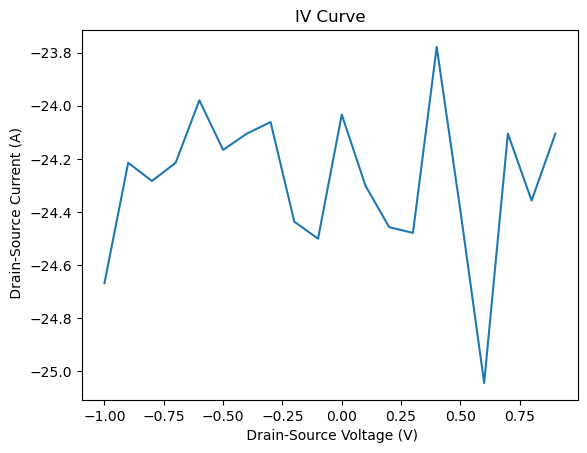

In [14]:
import pyvisa
import time
import math
rm = pyvisa.ResourceManager()
Keithley = rm.open_resource('GPIB0::24::INSTR')

# DeviceID
print(Keithley.query('*IDN?'))
sourceDelay = "1"
startv = "-1"
stopv = "1"
stepv ="0.1"
steps= "21"
startvprime = float(startv)
stopvprime = float(stopv)
stepvprime = float(stepv)
steps = (stopvprime - startvprime) / stepvprime 

# Turn off concurrent functions and set sensor to current with fixed voltage
Keithley.write(":SENS:FUNC:CONC OFF")
Keithley.write(":SOUR:FUNC VOLT")
Keithley.write(":SENS:FUNC 'CURR:DC' ")

# Voltage starting, ending, and spacing values based on input
Keithley.write(f":SOUR:VOLT:STAR {startv}")
Keithley.write(f":SOUR:VOLT:STOP {stopv}")
Keithley.write(f":SOUR:VOLT:STEP {stepv}")
Keithley.write(":SOUR:SWE:RANG AUTO")

# Set compliance current (in A), sweep direction, and data acquisition
Keithley.write(":SENS:CURR:PROT 0.1")
Keithley.write(":SOUR:SWE:SPAC LIN")
Keithley.write(f":SOUR:DEL {sourceDelay}")
#Keithley.write(":SOUR:SWE:POIN ", str(int(steps)))
Keithley.write(":TRIG:COUN ", str(int(steps)))
Keithley.write(":FORM:ELEM CURR")

# Set sweep mode and turn output on
Keithley.write(":SOUR:VOLT:MODE SWE")
Keithley.write(":OUTP ON")

# Initiate sweep, collect ACSII current values, and turn output off
result = Keithley.query(":READ?")
yvalues = Keithley.query_ascii_values(":FETC?")
logYvlaues = []
for y in yvalues:
    print(y)
    value = math.log(abs(y))
    print(value)
    logYvlaues.append(value)
                      
        
Keithley.write(":OUTP OFF")
Keithley.write(":SOUR:VOLT 0")

# Import Pyplot, NumPy, and SciPy
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Create xvalues array and calculate conductance
xvalues = np.arange(startvprime,stopvprime,stepvprime)
slope, intercept, r_value, p_value, std_error = stats.linregress(xvalues, logYvlaues)

# Plot values and output conductance to command line
print("Conductance:", slope, "Siemens")
plt.plot(xvalues,logYvlaues)
plt.xlabel(' Drain-Source Voltage (V)')
plt.ylabel(' Drain-Source Current (A)')
plt.title('IV Curve')
plt.show()
np.savetxt("test", (xvalues,yvalues)) 

In [30]:
import pyvisa
import time
import math
rm = pyvisa.ResourceManager()
Keithley = rm.open_resource('GPIB0::24::INSTR')

# DeviceID
print(Keithley.query('*IDN?'))
sourceDelay = "1"
startv = "-1"
stopv = "1"
stepv ="0.1"
steps= "21"
startvprime = float(startv)
stopvprime = float(stopv)
stepvprime = float(stepv)
steps = (stopvprime - startvprime) / stepvprime 

# Turn off concurrent functions and set sensor to current with fixed voltage
Keithley.write("SENS:CURR:PROT 0.1")

KEITHLEY INSTRUMENTS INC.,MODEL 2420,4051227,C32   Oct  4 2010 14:20:11/A02  /J/L



20